In [6]:
%matplotlib widget

In [7]:
from bmcs_shear.dic_crack import DICGrid, DICAlignedGrid, DICCOR, DICInspector, DICCrack

# $\varphi$ Evaluation

<img src="phi eval.png" width="700"/> 

The distance formulas for calculating $d_{0t}$ and $d_[0c]$ are as follows:
\begin{equation}
    d_{0t} = \sqrt{(x_t - x_0)^2 + (y_t - y_0)^2}
    \label{d_0t}
\end{equation}

\begin{equation}
    d_{0c} = \sqrt{(x_{\mathrm{COR}} - x_0)^2 + (y_{\mathrm{COR}} - y_0)^2}
    \label{d_0c}
\end{equation}
After calculating the distances, the angle of rotation $\varphi$ can be calculated as:
\begin{equation}
    \varphi = \arctan \left(\frac{d_{0t}}{d_{0c}} \right)
    \label{varphi}
\end{equation}

In [17]:
import numpy as np
end_t_arr = np.arange(1,31,1)
phi_arr = []
#for i in range(len(end_t_val)):
for end_t in end_t_arr:
    
    # dic_grd, dic_aligned_grid, dic_cor
    dic_grid = DICGrid(n_x=58, n_y=15, d_x=22, d_y=22, 
                     start_t=0, end_t=end_t, U_factor=1, dir_name='B6_TV1')
    dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-17, y_ref_j_min=1, y_ref_j_max=10)
    dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 29, n_x_max = 38, n_x_step=1, n_y_min = 4, n_y_step = 1)
    
    # evaluating deltas
    delta_u_ul_ija = dic_cor.dic_aligned_grid.delta_u_ul_ija
    delta_u0_ul_ija = dic_cor.dic_aligned_grid.delta_u0_ul_ija
    
    # selected points for rotation
    rot_Xu_ija = dic_cor.dic_aligned_grid.rot_Xu_ija
    rot_Xu_ija_sel = (dic_cor.dic_aligned_grid.rot_Xu_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                                   dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
    rot_X_pa_sel = rot_Xu_ija_sel.reshape(-1, 2)

    # selection of grid of points
    X_ija_sel = dic_cor.dic_grid.X_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                    dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step]
    X_pa_sel = X_ija_sel.reshape(-1, 2)

    # evaluating distances using distance formula

    d_0c = np.sqrt((dic_cor.x_cor_pa_sol[:, 0] - X_pa_sel[:, 0]) ** 2
                                     + (dic_cor.x_cor_pa_sol[:, 1] - X_pa_sel[:, 1]) ** 2)

    d_0t = np.sqrt((rot_X_pa_sel[:, 0] - X_pa_sel[:, 0]) ** 2
                                     + (rot_X_pa_sel[:, 1] - X_pa_sel[:, 1]) ** 2)
    
    phi = np.arctan(d_0t/d_0c)
    
    phi_avg = np.average(phi)
    
    phi_arr.append(phi_avg)
    
    print('phi_avg', phi_avg)

phi_avg 0.008974807379963055
phi_avg 0.027847481375581996
phi_avg 0.04381331265356346
phi_avg 0.055978615353909404
phi_avg 0.06245813632601581
phi_avg 0.06840892303563316
phi_avg 0.06505087460884663
phi_avg 0.07321531909703938
phi_avg 0.0737476687583077
phi_avg 0.08222713825157449
phi_avg 0.07802921095800469
phi_avg 0.07734420222783003
phi_avg 0.07238917830757183
phi_avg 0.07449255011437024
phi_avg 0.07844323423048204
phi_avg 0.07427167348231953
phi_avg 0.0749021962827637
phi_avg 0.08506587419975753
phi_avg 0.07999661716459774
phi_avg 0.079994232349502
phi_avg 0.046311839775123195
phi_avg 0.08149194026255381
phi_avg 0.08029587865590047
phi_avg 0.07639584095831205
phi_avg 0.0861478057018022
phi_avg 0.09087965967291733
phi_avg 0.07324386854169807
phi_avg 0.05838215301080176
phi_avg 0.06038048442992672
phi_avg 0.011275507784096105


In [18]:
load = np.loadtxt(r"D:\Shear zones\load text files\Load_b6_tv1.txt", unpack=True)
#np.shape(load)
#load

(Text(0.5, 0, '$\\varphi$'), Text(0, 0.5, 'Load'))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
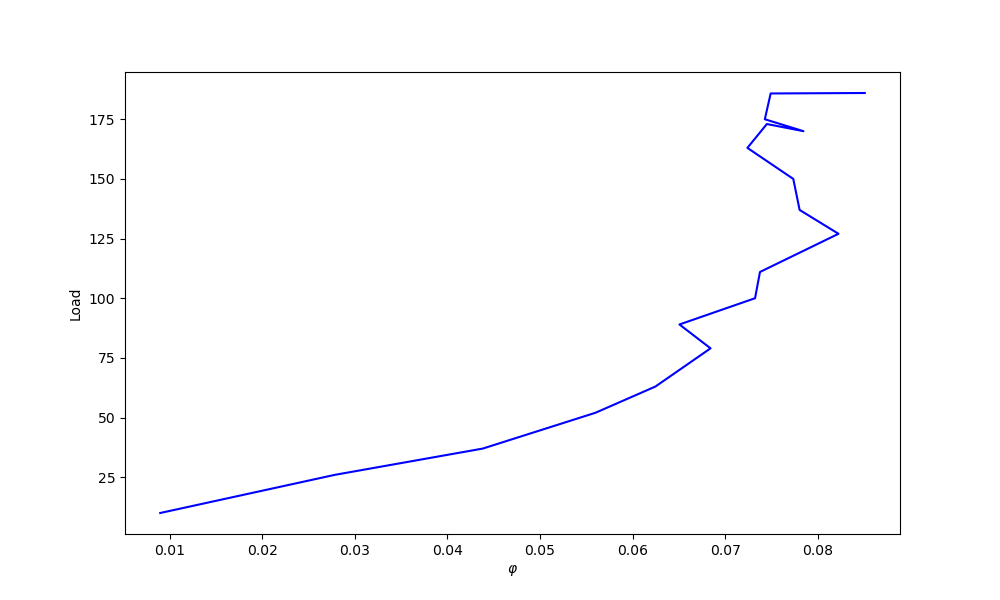

In [23]:
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.plot(phi_arr[0:18], load[1:19], color = 'blue')
ax1.set_xlabel(r'$\varphi$'), ax1.set_ylabel('Load')
#plt.savefig("D:\\Shear zones\drawings\Load_rotation.pdf")

In [ ]:
#     d_tc = np.sqrt((dic_cor.x_cor_pa_sol[:, 0] - rot_X_pa_sel[:, 0]) ** 2
#                                    + (dic_cor.x_cor_pa_sol[:, 1] - rot_X_pa_sel[:, 1]) ** 2)

    
#     # averaging all distances
#     d_tc_avg = np.average(d_tc)
#     d_0c_avg = np.average(d_0c)
#     d_0t_avg = np.average(d_0t)


    
#     # calculating phi using law of cosine
#     phi = np.arccos(
#             (d_tc_avg ** 2 + d_0c_avg ** 2 - d_0t_avg ** 2)
#             / (2 * d_tc_avg * d_0c_avg))
#     phi_val.append(phi)
    #print(phi_val)
    